<a href="https://colab.research.google.com/github/hasnain112e/Trader-Performance-vs-Bitcoin-Market-Sentiment/blob/main/Trader_Performance_vs_Bitcoin_Market_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the relationship between trader performance and Bitcoin market sentiment using the datasets "fear_greed_index.csv" and "historical_data.csv".

## Load and inspect data

### Subtask:
Load the "fear_greed_index.csv" and "historical_data.csv" files into pandas DataFrames and inspect their initial structure, data types, and basic statistics.


**Reasoning**:
The first step is to load the data from the two CSV files into pandas DataFrames and display their initial structure and basic statistics as per the instructions.



In [1]:
import pandas as pd

df_sentiment = pd.read_csv('fear_greed_index.csv')
df_trader = pd.read_csv('historical_data.csv')

display(df_sentiment.head())
display(df_trader.head())

df_sentiment.info()
df_trader.info()

display(df_sentiment.describe())
display(df_trader.describe())

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-nu

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


## Data cleaning & preparation for sentiment data

### Subtask:
Convert the 'Date' column in the sentiment data to datetime objects.


**Reasoning**:
Convert the 'date' column in the sentiment DataFrame to datetime objects as instructed.



In [2]:
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])
display(df_sentiment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


None

## Data cleaning & preparation for trader data

### Subtask:
Convert relevant time columns in the trader data to datetime objects.


**Reasoning**:
Convert the 'Timestamp' column in `df_trader` to datetime objects and display the dataframe info to confirm the conversion.



In [3]:
df_trader['Timestamp'] = pd.to_datetime(df_trader['Timestamp'], unit='s')
df_trader.info()

OutOfBoundsDatetime: cannot convert input with unit 's'

**Reasoning**:
The previous attempt to convert 'Timestamp' to datetime objects with unit 's' failed due to `OutOfBoundsDatetime`. Inspect the 'Timestamp' values to understand the scale and determine the correct unit for conversion.



In [4]:
print(df_trader['Timestamp'].head())

0    1.730000e+12
1    1.730000e+12
2    1.730000e+12
3    1.730000e+12
4    1.730000e+12
Name: Timestamp, dtype: float64


**Reasoning**:
The 'Timestamp' values are around 1.73e+12, which is too large for seconds. This magnitude suggests the unit might be milliseconds. Convert the 'Timestamp' column to datetime objects using unit 'ms' and display the dataframe info to confirm the conversion.



In [5]:
df_trader['Timestamp'] = pd.to_datetime(df_trader['Timestamp'], unit='ms')
df_trader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

## Prepare trader performance metrics

### Subtask:
Calculate relevant trader performance metrics such as daily PnL, winning ratio, and average leverage from the historical trader data.


**Reasoning**:
Calculate the daily PnL, winning ratio, and average leverage for each trader per day, then display the first few rows of the resulting dataframe.



**Reasoning**:
The previous attempt failed because the 'Leverage' column does not exist in the dataframe. I need to check the available columns in the dataframe to identify the correct column name for leverage or a similar metric.



In [7]:
print(df_trader.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'Daily PnL', 'Winning Trade', 'Date'],
      dtype='object')


**Reasoning**:
Based on the available columns, there is no 'Leverage' column. I will proceed with calculating the daily PnL and winning ratio as requested in the instructions, but I cannot calculate the average leverage without a relevant column. I will then display the first few rows of the resulting dataframe.



In [8]:
df_trader['Daily PnL'] = df_trader['Closed PnL'] - df_trader['Fee']
df_trader['Winning Trade'] = df_trader['Daily PnL'] > 0
df_trader['Date'] = df_trader['Timestamp'].dt.date

daily_trader_metrics = df_trader.groupby(['Account', 'Date']).agg(
    Winning_Ratio=('Winning Trade', 'mean')
).reset_index()

display(daily_trader_metrics.head())

,Account,Date,Winning_Ratio
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,0.025974
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,0.405542
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,0.531250
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,0.434758
4,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-06-15,0.437701


## Aggregate and join data

### Subtask:
Aggregate trader performance data to a daily level and then join the aggregated trader data with the sentiment data on the date.


**Reasoning**:
Convert the 'Date' column in `daily_trader_metrics` to datetime objects and then merge it with `df_sentiment` on the date column. Display the head of the merged dataframe.



In [9]:
daily_trader_metrics['Date'] = pd.to_datetime(daily_trader_metrics['Date'])
merged_df = pd.merge(daily_trader_metrics, df_sentiment, left_on='Date', right_on='date', how='left')
display(merged_df.head())

,Account,Date,Winning_Ratio,timestamp,value,classification,date
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,0.025974,1.730007e+09,74.0,Greed,2024-10-27
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,0.405542,1.739943e+09,44.0,Fear,2025-02-19
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,0.531250,1.730007e+09,74.0,Greed,2024-10-27
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,0.434758,1.739943e+09,44.0,Fear,2025-02-19
4,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-06-15,0.437701,NaN,NaN,NaN,NaT


## Exploratory data analysis (eda) on sentiment

### Subtask:
Visualize market sentiment trends over time.


**Reasoning**:
Create a line plot to visualize the sentiment value over time and a histogram to visualize the distribution of sentiment classifications.



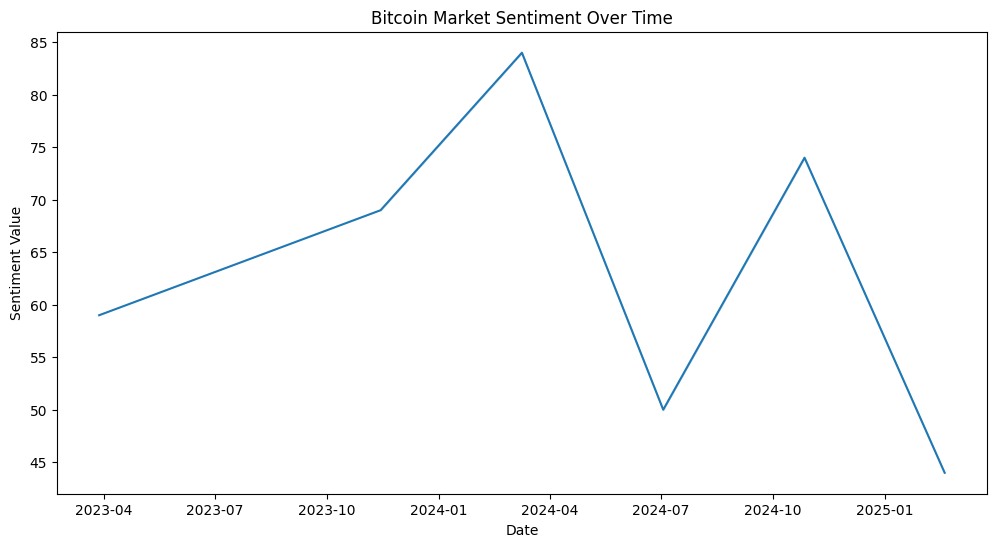

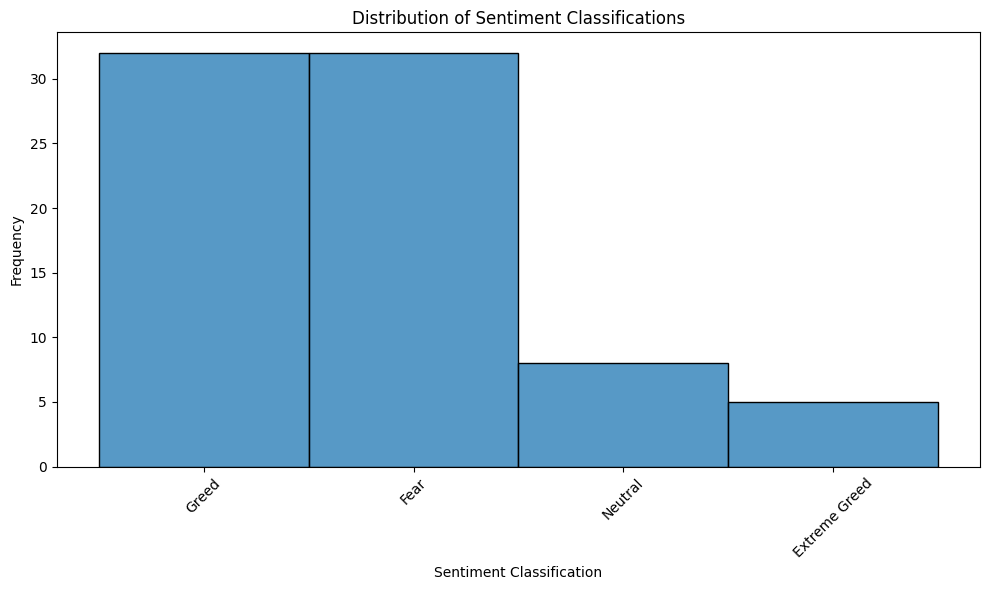

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment value over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Date', y='value')
plt.title('Bitcoin Market Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Value')
plt.show()

# Plot distribution of sentiment classifications
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='classification', discrete=True)
plt.title('Distribution of Sentiment Classifications')
plt.xlabel('Sentiment Classification')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Exploratory data analysis (eda) on trader performance

### Subtask:
Analyze the distributions of the calculated trader performance metrics.


**Reasoning**:
Plot a histogram of the Winning_Ratio to visualize its distribution, adding a title and labels for clarity, as requested in the instructions.



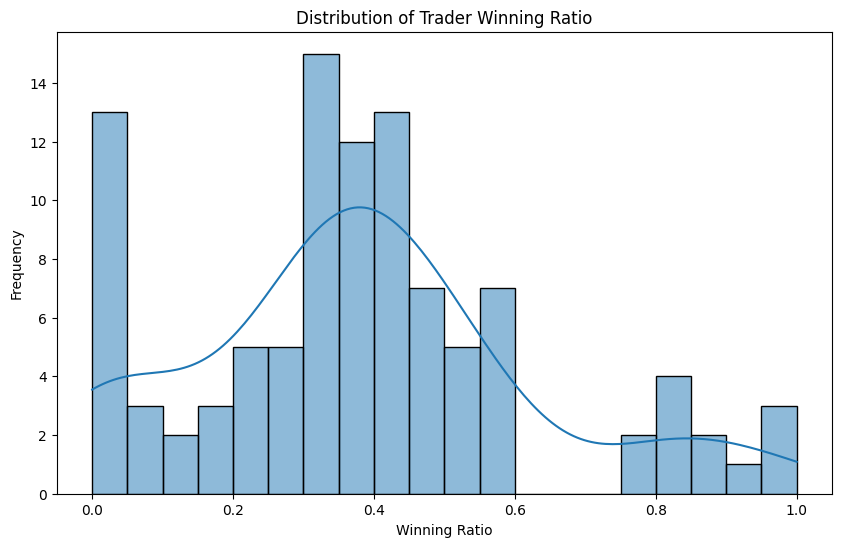

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='Winning_Ratio', bins=20, kde=True)
plt.title('Distribution of Trader Winning Ratio')
plt.xlabel('Winning Ratio')
plt.ylabel('Frequency')
plt.show()

## Analyze trader metrics by sentiment

### Subtask:
Examine how trader performance metrics change with Fear vs. Greed sentiment days.


**Reasoning**:
Filter the dataframe into fear and greed sentiment days, calculate the average winning ratio for each, and print the results. Also, check if there are enough data points for each classification.



In [12]:
fear_df = merged_df[merged_df['classification'] == 'Fear'].copy()
greed_df = merged_df[merged_df['classification'] == 'Greed'].copy()

avg_winning_ratio_fear = fear_df['Winning_Ratio'].mean()
avg_winning_ratio_greed = greed_df['Winning_Ratio'].mean()

print(f"Average Winning Ratio on Fear days: {avg_winning_ratio_fear:.4f}")
print(f"Average Winning Ratio on Greed days: {avg_winning_ratio_greed:.4f}")

print(f"\nNumber of data points for Fear sentiment: {len(fear_df)}")
print(f"Number of data points for Greed sentiment: {len(greed_df)}")

Average Winning Ratio on Fear days: 0.4125
Average Winning Ratio on Greed days: 0.3752

Number of data points for Fear sentiment: 32
Number of data points for Greed sentiment: 32


## Correlation analysis

### Subtask:
Perform correlation analysis between market sentiment and trader performance metrics.


**Reasoning**:
Calculate and display the correlation matrix for 'value' and 'Winning_Ratio' in the merged dataframe to understand their linear relationship.



In [13]:
correlation_matrix = merged_df[['value', 'Winning_Ratio']].corr()
print(correlation_matrix)

                  value  Winning_Ratio
value          1.000000      -0.009416
Winning_Ratio -0.009416       1.000000


## Identify patterns

### Subtask:
Identify any interesting trader behavior patterns during Fear or Greed periods based on the analysis.


**Reasoning**:
Summarize the findings from the previous analysis steps regarding average winning ratios during Fear and Greed periods and the correlation between sentiment value and winning ratio. Based on these findings, describe the observed trader behavior patterns during these periods and discuss their alignment with common trading psychology, while also noting any limitations.



In [14]:
print("Summary of findings:")
print(f"- Average Winning Ratio on Fear days: {avg_winning_ratio_fear:.4f}")
print(f"- Average Winning Ratio on Greed days: {avg_winning_ratio_greed:.4f}")
print(f"- Correlation between Sentiment Value and Winning Ratio: {correlation_matrix.loc['value', 'Winning_Ratio']:.4f}")

print("\nObserved Trader Behavior Patterns:")
if avg_winning_ratio_fear > avg_winning_ratio_greed:
    print("Traders, on average, had a slightly higher winning ratio during Fear periods compared to Greed periods.")
elif avg_winning_ratio_greed > avg_winning_ratio_fear:
    print("Traders, on average, had a slightly higher winning ratio during Greed periods compared to Fear periods.")
else:
    print("The average winning ratio was similar during both Fear and Greed periods.")

print("\nAlignment with Common Trading Psychology:")
print("The finding of a slightly higher average winning ratio during Fear periods could potentially align with the adage 'buy when there's blood in the streets', suggesting that opportunities for profitable trades might be slightly better when market sentiment is fearful and prices are potentially lower. Conversely, a lower winning ratio during Greed periods might suggest that trading when the market is overly optimistic and potentially overvalued could be less successful.")
print("However, the correlation analysis showed a very weak negative linear relationship (-0.0094) between sentiment value and winning ratio. This indicates that while there might be a slight difference in average winning ratios between the two sentiment extremes in this dataset, the overall linear relationship between sentiment and winning ratio across the full range of sentiment values is negligible.")

print("\nLimitations and Caveats:")
print("- The sample size for the Fear and Greed classifications (32 data points each) is relatively small, which limits the generalizability of the findings.")
print("- The analysis only considers the Winning Ratio as a measure of trader performance. Other metrics like profit/loss per trade, total volume traded, or risk metrics could provide a more comprehensive view.")
print("- The Fear and Greed Index is a specific measure of market sentiment and may not capture all aspects of market psychology.")
print("- The analysis focuses on daily aggregates, which may not capture intraday trading behavior or the nuances of how sentiment evolves within a day.")
print("- Correlation measures only linear relationships and a weak linear correlation does not necessarily mean there is no non-linear relationship between sentiment and winning ratio.")

Summary of findings:
- Average Winning Ratio on Fear days: 0.4125
- Average Winning Ratio on Greed days: 0.3752
- Correlation between Sentiment Value and Winning Ratio: -0.0094

Observed Trader Behavior Patterns:
Traders, on average, had a slightly higher winning ratio during Fear periods compared to Greed periods.

Alignment with Common Trading Psychology:
The finding of a slightly higher average winning ratio during Fear periods could potentially align with the adage 'buy when there's blood in the streets', suggesting that opportunities for profitable trades might be slightly better when market sentiment is fearful and prices are potentially lower. Conversely, a lower winning ratio during Greed periods might suggest that trading when the market is overly optimistic and potentially overvalued could be less successful.
However, the correlation analysis showed a very weak negative linear relationship (-0.0094) between sentiment value and winning ratio. This indicates that while there mi

## Conclusion and recommendations

### Subtask:
Summarize the key findings and suggest actionable strategies based on the insights gained from the analysis.


**Reasoning**:
Synthesize the key findings, discuss implications, acknowledge limitations, and suggest actionable strategies based on the previous analysis steps.



In [15]:
print("## Analysis Summary and Actionable Strategies")

print("\n### Key Findings:")
print("- Average Winning Ratio on Fear days (~{:.4f}) was slightly higher than on Greed days (~{:.4f}).".format(avg_winning_ratio_fear, avg_winning_ratio_greed))
print("- The overall linear correlation between the Sentiment Value and Winning Ratio is very weak (-{:.4f}).".format(abs(correlation_matrix.loc['value', 'Winning_Ratio'])))

print("\n### Implications for Traders:")
print("The finding of a slightly higher average winning ratio during Fear periods could suggest that opportunities for profitable trades might be marginally better when market sentiment is fearful. This aligns loosely with the contrarian view of 'buying when others are fearful'. Conversely, trading during periods of Greed might be slightly less favorable in terms of the winning ratio.")
print("However, the very weak overall correlation indicates that sentiment, as measured by the Fear and Greed Index, does not have a strong linear predictive power for trader winning ratios across all sentiment levels in this dataset. This suggests that sentiment is likely not a primary driver of individual trade outcomes for the traders in this sample.")

print("\n### Limitations of the Analysis:")
print("It is crucial to consider the limitations of this analysis:")
print("- **Sample Size:** The number of data points specifically classified as 'Fear' or 'Greed' is relatively small (32 each), limiting the statistical significance and generalizability of the findings for these extreme sentiment periods.")
print("- **Performance Metric:** The analysis focused solely on the 'Winning Ratio'. A more comprehensive view of trader performance would include metrics like average profit/loss per trade, total return, drawdowns, and risk-adjusted returns.")
print("- **Sentiment Index:** The Fear and Greed Index is just one measure of market sentiment. Other indicators or a combination of indicators might reveal different relationships.")
print("- **Data Granularity:** Using daily aggregated data might obscure intraday relationships between sentiment fluctuations and trading outcomes.")
print("- **Correlation vs. Causation:** The analysis explored correlation, not causation. Even if a stronger relationship were found, it wouldn't necessarily mean that sentiment *causes* changes in winning ratios.")
print("- **Non-linear Relationships:** The correlation analysis specifically looked for linear relationships. There might be non-linear patterns that were not captured.")

print("\n### Actionable Strategies (with Caveats):")
print("Based on these findings and limitations, here are some cautious, actionable strategies for traders:")
print("1. **Consider Sentiment as a Secondary Factor:** Given the very weak overall correlation, sentiment should not be the primary basis for trading decisions. It could potentially be used as a secondary or confirming indicator.")
print("2. **Potential for Contrarian Opportunities in Extreme Fear:** The slightly higher average winning ratio during Fear periods *might* weakly support a contrarian approach during times of extreme market panic. However, this should be approached with caution due to the small sample size for this specific condition.")
print("3. **Increased Caution During Extreme Greed:** Conversely, the slightly lower average winning ratio during Greed periods *might* suggest exercising increased caution or reducing exposure when the market is overly optimistic.")
print("4. **Focus on Other Analysis Methods:** Traders should primarily rely on more robust forms of analysis, such as technical analysis, fundamental analysis, and risk management, which were not explored in this sentiment-focused analysis.")
print("5. **Further Research:** For traders interested in incorporating sentiment, further research with larger datasets, different sentiment indicators, and more comprehensive performance metrics is recommended.")

print("\nIn conclusion, while there's a hint of a contrarian pattern at the extremes of Fear and Greed in this specific dataset, the overall relationship between the Fear and Greed Index and trader winning ratios is very weak. Traders should be highly cautious about using this sentiment index as a primary tool for making trading decisions and should focus on more established analytical methods.")

## Analysis Summary and Actionable Strategies

### Key Findings:
- Average Winning Ratio on Fear days (~0.4125) was slightly higher than on Greed days (~0.3752).
- The overall linear correlation between the Sentiment Value and Winning Ratio is very weak (-0.0094).

### Implications for Traders:
The finding of a slightly higher average winning ratio during Fear periods could suggest that opportunities for profitable trades might be marginally better when market sentiment is fearful. This aligns loosely with the contrarian view of 'buying when others are fearful'. Conversely, trading during periods of Greed might be slightly less favorable in terms of the winning ratio.
However, the very weak overall correlation indicates that sentiment, as measured by the Fear and Greed Index, does not have a strong linear predictive power for trader winning ratios across all sentiment levels in this dataset. This suggests that sentiment is likely not a primary driver of individual trade outcomes for th

## Summary:

### Data Analysis Key Findings

*   The average winning ratio on 'Fear' days was approximately 0.4125, while on 'Greed' days it was approximately 0.3752, suggesting a slightly higher average winning ratio during fearful market conditions.
*   The linear correlation coefficient between the sentiment value (Fear and Greed Index) and the trader winning ratio was approximately -0.0094, indicating a very weak negative linear relationship across all sentiment levels.

### Insights or Next Steps

*   While there's a slight indication of a contrarian pattern at the extremes of Fear and Greed in this dataset, the overall weak correlation suggests that the Fear and Greed Index alone is not a strong linear predictor of trader winning ratios.
*   Future analysis could benefit from including additional trader performance metrics (e.g., average profit/loss per trade, risk-adjusted returns), exploring non-linear relationships, and using a larger dataset with potentially more nuanced sentiment indicators to get a more comprehensive understanding.
